In [157]:
# Imports
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

In [158]:
def randcoefs(i,j):
    up=randomgrid[2*i,j+1]
    down=randomgrid[2*i+2,j+1]
    left=randomgrid[2*i+1,j-1]
    right=randomgrid[2*i+1,j+1]
    return (up,left,down,right)
def updaterand(i,j):
    #gives updated value of i,j point
    up=grid[i-1,j]
    left=grid[i,j-1]
    down=grid[i+1,j]
    right=grid[i,j+1]
    co=randcoefs(i,j)
    '''
    b=(
        co[1]*co[2]*co[3]
    +co[0]*co[2]*co[3]
    +co[0]*co[1]*co[3]
    +co[0]*co[1]*co[2]
    )
    '''

    val=(
        up*co[1]*co[2]*co[3]
        +left*co[0]*co[2]*co[3]
        +down*co[0]*co[1]*co[3]
        +right*co[0]*co[1]*co[2]
    )/(
        co[1]*co[2]*co[3]
        +co[0]*co[2]*co[3]
        +co[0]*co[1]*co[3]
        +co[0]*co[1]*co[2]
        )

    return val

#random case
np.random.seed(0)
p = np.array([0.3,0.7])
def choose():
    #2 and 1 are conductivity
    return np.random.choice([1,5], p = p.ravel())


In [159]:
# Global Settings

# Dimension of simulation
dim=111
num_iter=300

grid=np.zeros((dim,dim))
center=int((dim-1)/2)
grid[center,center]=3
randomgrid=np.zeros((2*dim+1,dim+1))
for i in range(2*dim+1):
    for j in range(dim+1):
        randomgrid[i,j]=choose()
#print(randomgrid)

In [160]:

grid=np.zeros((dim,dim))
#print(grid)
center=int((dim-1)/2)
grid[center,center]=1
newgrid=deepcopy(grid)
for time in range(num_iter):
    for i in range(1,dim-1):
        for j in range(1,dim-1):
            newgrid[i,j]=updaterand(i,j)
    newgrid[center,center]=grid[center,center]
    grid=deepcopy(newgrid)
    #print(time)
#print(grid)




#a=[i for i in range(dim)]
#x,y=np.meshgrid(a,a)
#plt.matshow(grid, cmap=plt.cm.gray)
#plt.show()

x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)

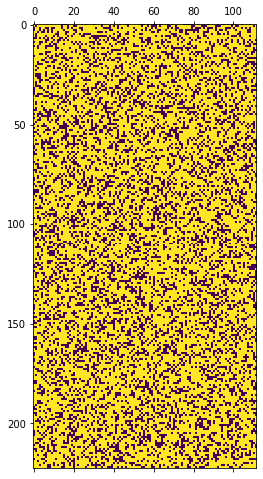

In [161]:
plt.matshow(randomgrid)

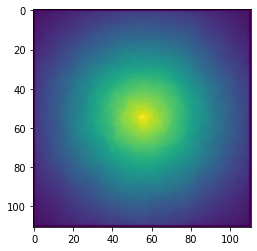

In [167]:
plt.imshow(grid**0.1)

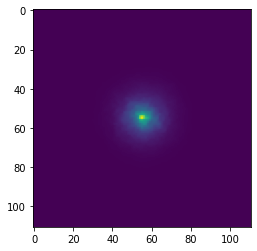

In [163]:
plt.imshow(grid)

<ipython-input-164-48a628e77cb8>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(grid))


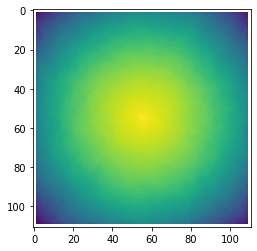

In [164]:
plt.imshow(np.log(grid))

# Discussion on plots
The graph indicates that the voltage distribution has no or "very weak" relation with direction, which means we can treat this composites as isotopic. This matches with the intuition that the different resistors are randomly distributed.

To illustrate this we can compare this result to one obtained in two-material case with regular microscopic structure. Isotropicity is shown as no microscopic structure apart from random distribution is enabled in this simulation.

It is possible to use this method to study the case for more complex composites.